# KBMod Analysis Demo

To run an example of kbmod from start to finish you can use the following steps:

1) Setup `kbmod` with the `setup.bash` file in the main directory of the repo by: `source setup.bash`

2) Run `example_search.py` with the following settings:

  * **image_dir**: The directory with the images from a single field
    
  * **results_dir**: The directory where you want to save the results
    
  * **results_suffix**: Suffix to add when saving results files. Setting this as `test` then files will be saved as "..._test.txt". Five results files would be saved:
      * `lc_test.txt`: File with the light curves from results after going through Kalman Filter.
      * `results_test.txt`: File with the x,y pixel locations, velocity, flux, likelihood, and number of unmasked observations of each result.
      * `ps_test.txt`: File with the summed postage stamp for each result.
      * `times_test.txt`: File with the MJD of each observation in the saved lightcurve.
      * `filtered_likes_test.txt`: The recalculated likelihood values for each results after removing observations with the Kalman Filter.
  * **time_file**: Location of a file with each row containing (visit_num, visit_mjd) for observations in dataset.
    
3) Command will be like the following:

```
python3 example_search.py --image_dir image_dir --results_dir results_dir --results_suffix test --time_file image_times.dat
```

4) Once you have the results you can use the steps in this notebook to create plots with postage stamps and lightcurves side-by-side for a final look by eye.

In [20]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from create_stamps import create_stamps

In [3]:
# Directory where output from kbmod search are located
results_dir = '/home/kbmod-usr/cuda-workspace/HITS/clean_setup/fake_results/'
im_dir = '/home/kbmod-usr/cuda-workspace/HITS/clean_setup/test_images/'

In [4]:
image_list = sorted(os.listdir(im_dir))
image_list = [os.path.join(im_dir, im_name) for im_name in image_list]

In [5]:
stamper = create_stamps()

In [6]:
times_filename = os.path.join(results_dir, 'times_test.txt')
times_list = stamper.load_times(times_filename)

In [7]:
lc_filename = os.path.join(results_dir, 'lc_test.txt')
lc_list = stamper.load_lightcurves(lc_filename)

In [8]:
stamp_filename = os.path.join(results_dir, 'ps_test.txt')
stamps = stamper.load_stamps(stamp_filename)

In [9]:
result_filename = os.path.join(results_dir, 'results_test.txt')
results = stamper.load_results(result_filename)

In [10]:
keep_idx = stamper.stamp_filter(stamps, 0.03)

Center filtering keeps 25 out of 42 stamps.


Center filtering keeps 25 out of 42 stamps.


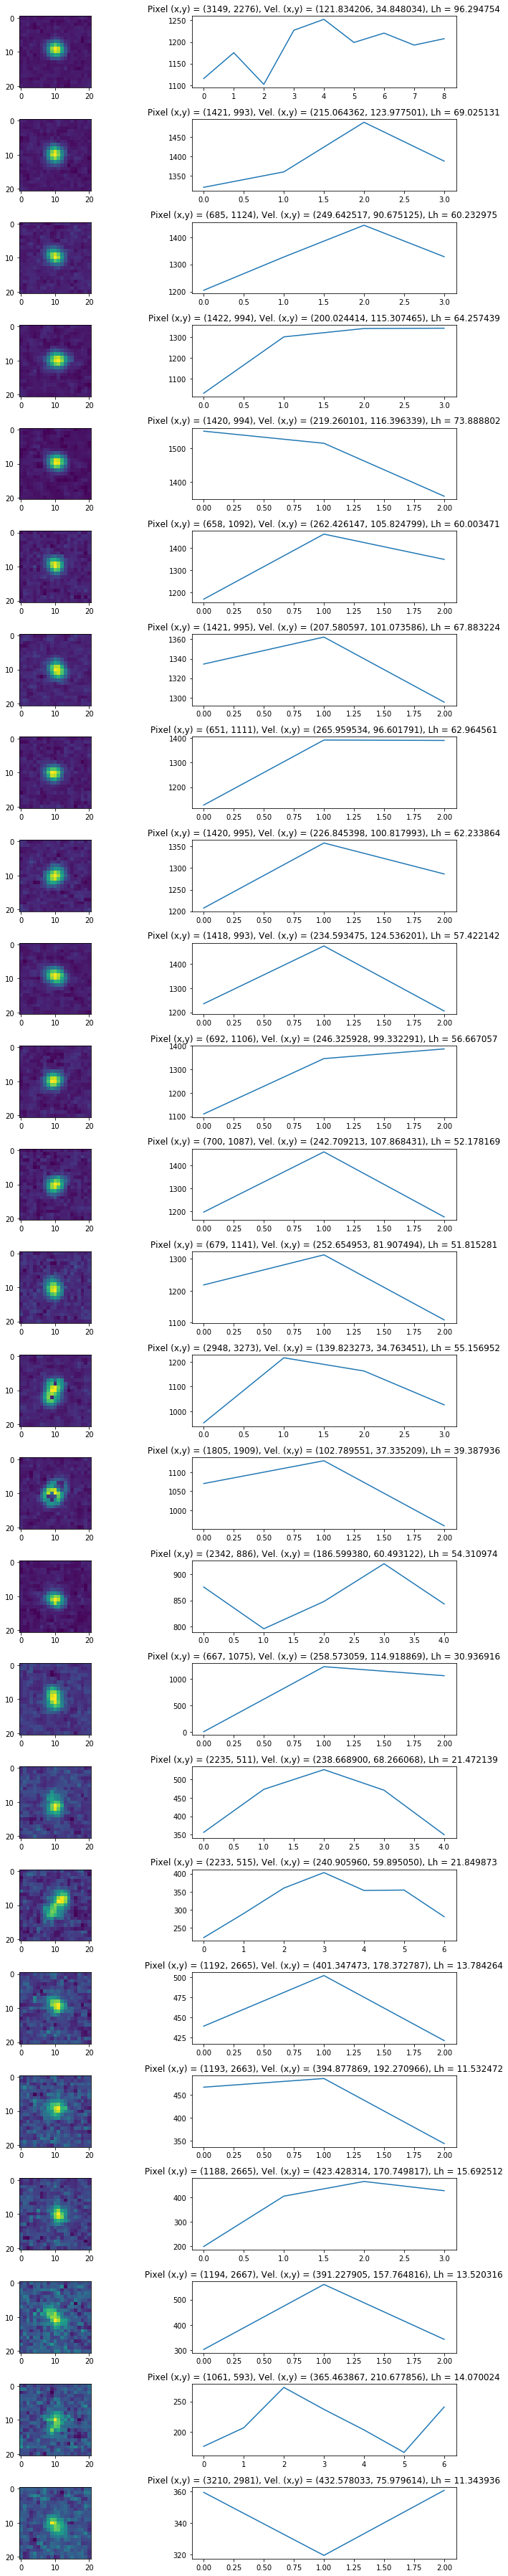

In [11]:
stamps_fig = stamper.plot_stamps(results, lc_list, stamps, 0.03)

In [15]:
fake_df = pd.read_csv('/home/kbmod-usr/cuda-workspace/HITS/clean_setup/fake_results/results_fakes.txt', delimiter=' ', 
            header=None, names=['x', 'y', 'vx', 'vy', 'flux', 'mag_val'])

In [16]:
res_df = pd.DataFrame(results).iloc[keep_idx]

In [17]:
mag_results = []
for res_idx in keep_idx:
    mag_results.append(stamper.calc_mag(image_list, lc_list[res_idx], times_list[res_idx]))

Text(0,0.5,'counts')

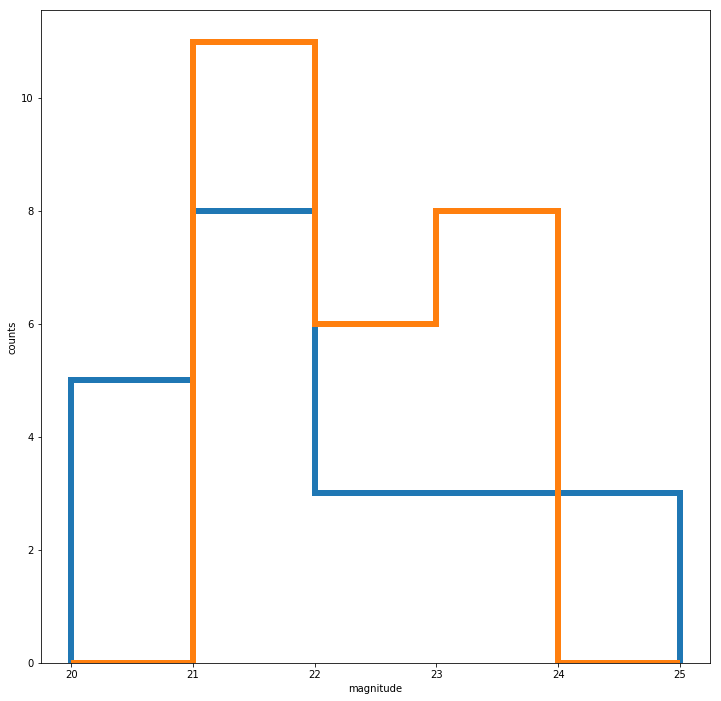

In [25]:
fig = plt.figure(figsize=(12,12))
plt.hist(fake_df['mag_val'], bins=np.arange(20, 26), histtype='step', lw=6)
plt.hist(mag_results, bins=np.arange(20,26), histtype='step', lw=6)
plt.xlabel('magnitude')
plt.ylabel('counts')